<a id="sommaire"></a>
# Sommaire
* [Introduction](#Introduction)
    * Contexte et Objectifs
    * Questions de Recherche
* [Configuration de l'Environnement](#Configuration-de-lEnvironnement)
    * Importation des Bibliothèques
    * Chargement des Données
* [Exploration des Données](#Exploration-des-Données)
    * Aperçu des Données
    * Statistiques des Données
    * Vérification des Colonnes
* [Nettoyage et Prétraitement des Données](#Nettoyage-et-Prétraitement-des-Données)
    * Valeurs Manquantes
    * Normalisation des Données
* [Analyse Exploratoire des Données (EDA)](#Analyse-Exploratoire-des-Données-EDA)
    * Distribution des Variables
    * Corrélation entre Variables
    * Graphiques de Dispersion
* [Sauvegarde des Résultats](#Sauvegarde-des-Résultats)


# Étape 1: Introduction<a class="anchor" id="Introduction"></a>

### Projet de Segmentation des Clients pour Olist

**Contexte**
Dans le cadre d'une mission de conseil pour Olist, une entreprise brésilienne offrant des solutions de vente sur les marketplaces en ligne, ce projet vise à élaborer une segmentation efficace des clients de l'entreprise. La segmentation des clients est une stratégie cruciale pour permettre à Olist d'améliorer ses campagnes de communication marketing, d'optimiser l'expérience client et de renforcer la fidélisation.

**Objectifs**
L'objectif principal de ce projet est de comprendre les différents types d’utilisateurs d'Olist à travers leurs comportements d'achat et leurs données personnelles. À partir de cette compréhension, nous développerons un modèle de segmentation des clients qui aidera l'équipe Marketing d'Olist à cibler plus efficacement ses communications.

Les sous-objectifs du projet incluent :

* Réaliser une analyse exploratoire des données pour comprendre les tendances, les comportements d'achat, et identifier les caractéristiques importantes des clients.
* Utiliser des techniques de clustering non supervisé pour segmenter les clients en groupes homogènes.
* Fournir une description détaillée et actionable de chaque segment de clientèle.
* Proposer une stratégie de maintenance du modèle de segmentation pour garantir sa pertinence au fil du temps.

**Questions de Recherche**
Pour orienter notre analyse et la modélisation, nous nous poserons les questions suivantes :

1. Quelles sont les principales caractéristiques des données clients disponibles qui peuvent influencer leur comportement d'achat ?
2. Comment pouvons-nous regrouper efficacement les clients en segments homogènes basés sur leur comportement d'achat et leurs données démographiques ?
3. Quels insights pouvons-nous tirer de chaque segment de clients pour améliorer les stratégies de communication marketing d'Olist ?
4. À quelle fréquence devons-nous mettre à jour le modèle de segmentation pour maintenir sa précision et sa pertinence ?

[Retour au sommaire](#sommaire)

# Étape 2: Configuration de l'environnement <a class="anchor" id="Configuration-de-lEnvironnement"></a>
## Import des bibliothèques nécessaires pour l'analyse

[Retour au sommaire](#sommaire)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import des métriques de validation
from sklearn.metrics import davies_bouldin_score, silhouette_score


from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

import sys
import os
import warnings
warnings.filterwarnings("ignore")

## Configuration du chemin d'accès aux données

In [2]:
path = 'C:/Users/Farid/Documents/OC/Cursus_Data_Scientist/Projet_5/data'

## Vérification des fichiers disponibles dans le répertoire de données

In [3]:
os.listdir(path)

['fichier_client.csv', 'olist.db']

## Chargement des données

Enfin, chargeons le fichier de données des clients pour commencer notre exploration.

In [4]:
customer_file = pd.read_csv(path + '/fichier_client.csv')

Ce fichier contiendra les informations essentielles sur les clients, qui serviront de base à notre analyse et à notre modélisation.

# Étape 3: Chargement et première exploration des données <a class="anchor" id="Exploration-des-Données"></a>

Après avoir configuré notre environnement et chargé les données nécessaires, il est temps de procéder à une première exploration de ces dernières. Cette étape est cruciale pour comprendre la structure de nos données et identifier les premières pistes d'analyse.

## Affichage des premières lignes du jeu de données

Pour commencer, jetons un œil aux premières lignes de notre DataFrame pour avoir une idée des informations contenues dans chaque colonne.

[Retour au sommaire](#sommaire)

In [5]:
customer_file.head()

,customer_unique_id,recence,frequence,montant_total,score_review_minimum
0,0000366f3b9a7992bf8c76cfdf3221e2,153.132905,1,129.90,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,159.248125,1,18.90,4
2,0000f46a3911fa3c0805444483337064,559.389734,1,69.00,3
3,0000f6ccb0745a6a4b88665a16c9f078,349.108970,1,25.99,4
4,0004aac84e0df4da2b147fca70cf8255,323.035463,1,180.00,5


## Résumé des informations du DataFrame

Ensuite, obtenons un résumé des informations sur le DataFrame pour vérifier les types de données et s'assurer qu'il n'y a pas de valeurs manquantes.

In [6]:
customer_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92747 entries, 0 to 92746
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    92747 non-null  object 
 1   recence               92747 non-null  float64
 2   frequence             92747 non-null  int64  
 3   montant_total         92747 non-null  float64
 4   score_review_minimum  92747 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.5+ MB


Ce résumé indique que notre DataFrame contient 92747 entrées, avec 5 colonnes et aucun signe de valeurs manquantes. Les types de données sont adéquats pour notre analyse.

## Statistiques descriptives du DataFrame

Pour mieux comprendre la distribution de nos données, nous réalisons une analyse descriptive des variables.

In [7]:
customer_file.describe()

,recence,frequence,montant_total,score_review_minimum
count,92747.000000,92747.000000,92747.000000,92747.000000
mean,273.138376,1.033543,141.396772,4.142161
std,151.935892,0.209552,214.472189,1.292997
min,-0.557477,1.000000,0.850000,1.000000
25%,152.275127,1.000000,47.650000,4.000000
50%,252.328252,1.000000,89.700000,5.000000
75%,382.413328,1.000000,154.000000,5.000000
max,735.426019,15.000000,13440.000000,5.000000


## Analyse détaillée des variables individuelles

Il est également utile d'examiner les statistiques descriptives pour chaque variable d'intérêt séparément, pour obtenir une compréhension plus fine de la distribution de chaque variable.

In [8]:
# Affichage de la variable 'recence'
print("Tableau de la variable 'recence'")
display(customer_file[['customer_unique_id', 'recence']].describe())

# Affichage de la variable 'frequence'
print("Tableau de la variable 'frequence'")
display(customer_file[['customer_unique_id', 'frequence']].describe())

# Affichage de la variable 'montant_total'
print("Tableau de la variable 'montant_total'")
display(customer_file[['customer_unique_id', 'montant_total']].describe())

# Affichage de la variable 'score_review_minimum'
print("Tableau de la variable 'score_review_minimum'")
display(customer_file[['customer_unique_id', 'score_review_minimum']].describe())

Tableau de la variable 'recence'


,recence
count,92747.000000
mean,273.138376
std,151.935892
min,-0.557477
25%,152.275127
50%,252.328252
75%,382.413328
max,735.426019


Tableau de la variable 'frequence'


,frequence
count,92747.000000
mean,1.033543
std,0.209552
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


Tableau de la variable 'montant_total'


,montant_total
count,92747.000000
mean,141.396772
std,214.472189
min,0.850000
25%,47.650000
50%,89.700000
75%,154.000000
max,13440.000000


Tableau de la variable 'score_review_minimum'


,score_review_minimum
count,92747.000000
mean,4.142161
std,1.292997
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Vérification des noms des colonnes

Enfin, vérifions les noms des colonnes pour s'assurer qu'ils sont corrects et cohérents, facilitant les manipulations futures.

In [9]:
customer_file.columns

Index(['customer_unique_id', 'recence', 'frequence', 'montant_total',
       'score_review_minimum'],
      dtype='object')

# Étape 4: Nettoyage et prétraitement des données <a class="anchor" id="Nettoyage-et-Prétraitement-des-Données"></a>

Après une première exploration des données, l'étape suivante consiste à nettoyer et à préparer ces données pour la modélisation. Cette phase est cruciale pour assurer la qualité des analyses ultérieures et des résultats de clustering.

## Vérification des valeurs manquantes

Il est essentiel de commencer par vérifier l'existence de valeurs manquantes dans notre jeu de données pour éviter des erreurs dans les analyses.

[Retour au sommaire](#sommaire)

In [10]:
# Vérifier les valeurs manquantes
missing_values = customer_file.isnull().sum()
print(missing_values)

customer_unique_id      0
recence                 0
frequence               0
montant_total           0
score_review_minimum    0
dtype: int64


## Prétraitement des données avec StandardScaler

L'étape de normalisation des variables est importante, surtout pour les algorithmes de clustering comme K-means qui sont sensibles à la mise à l'échelle des variables. Nous allons donc standardiser les variables numériques pour qu'elles contribuent équitablement au processus de clustering.

In [11]:
# Exclure la variable 'cluster'
data_for_scaling = customer_file[['recence', 'frequence', 'montant_total', 'score_review_minimum']]

# Créer un objet StandardScaler
scaler = StandardScaler()

# Prétraitement des données avec StandardScaler
scaled_data = scaler.fit_transform(data_for_scaling)

# Convertir les donnécves prétraitées en DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_for_scaling.columns)

# Afficher les premières lignes du DataFrame prétraité
scaled_df.head()


,recence,frequence,montant_total,score_review_minimum
0,-0.789847,-0.160071,-0.053605,0.663454
1,-0.749598,-0.160071,-0.571158,-0.109947
2,1.884037,-0.160071,-0.337560,-0.883349
3,0.500020,-0.160071,-0.538100,-0.109947
4,0.328411,-0.160071,0.179993,0.663454


# Étape 5: Analyse exploratoire des données (EDA) <a class="anchor" id="Analyse-Exploratoire-des-Données-EDA"></a>

L'analyse exploratoire nous permet d'approfondir notre compréhension des données à travers la visualisation et la quantification des relations entre les variables.

## Visualisation de la distribution des variables

Pour commencer, nous visualisons la distribution des différentes variables à l'aide d'histogrammes. Cela nous donne un aperçu de la forme de la distribution des données et nous aide à détecter les valeurs aberrantes.

[Retour au sommaire](#sommaire)

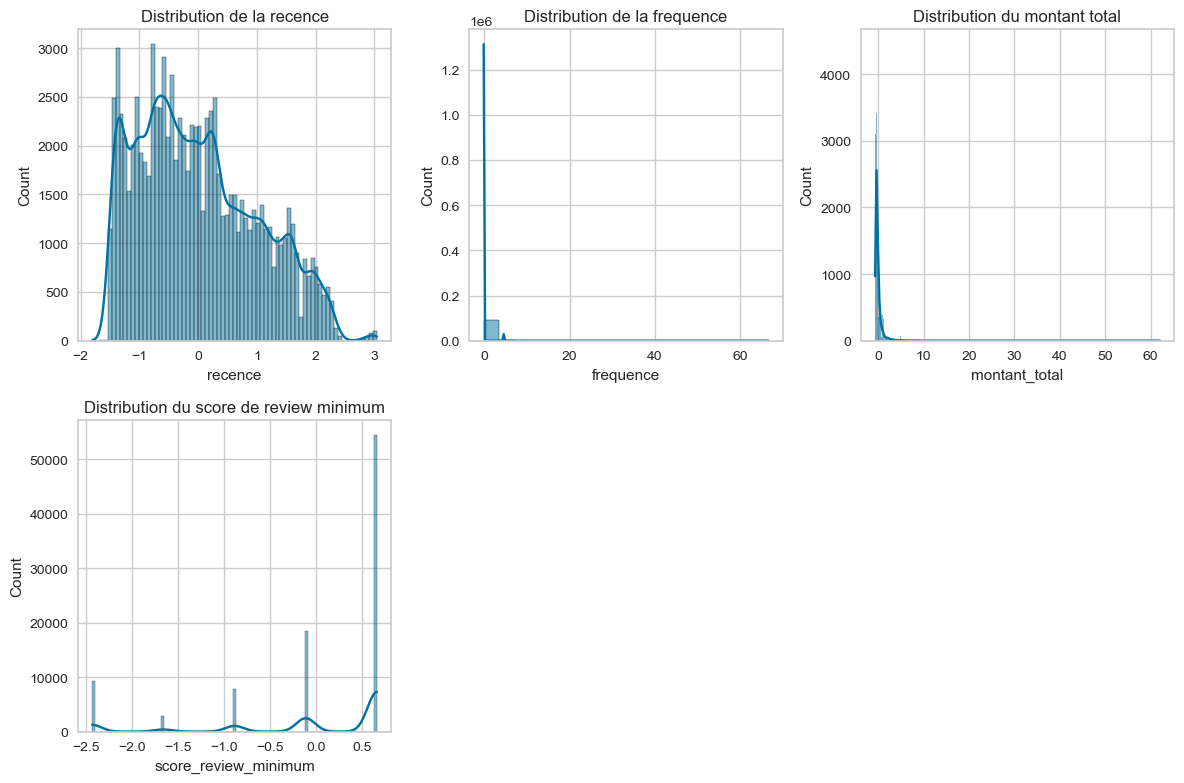

In [12]:
# Créer des histogrammes pour chaque variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(scaled_df['recence'], kde=True)
plt.title('Distribution de la recence')

plt.subplot(2, 3, 2)
sns.histplot(scaled_df['frequence'], kde=True)
plt.title('Distribution de la frequence')

plt.subplot(2, 3, 3)
sns.histplot(scaled_df['montant_total'], kde=True)
plt.title('Distribution du montant total')

plt.subplot(2, 3, 4)
sns.histplot(scaled_df['score_review_minimum'], kde=True)
plt.title('Distribution du score de review minimum')
# plt.yscale('log')

plt.tight_layout()
plt.show()

**Brève Analyse des Graphiques**

* **Recence :** La distribution semble relativement symétrique, suggérant une certaine uniformité dans le temps écoulé depuis le dernier achat des clients.


* **Frequence :** La concentration autour de la valeur 1 indique que la majorité des clients ont effectué un seul achat.


* **Montant Total :** La présence de valeurs extrêmes dans le montant total dépensé peut signaler des comportements d'achat exceptionnels ou des clients très dépensiers.


* **Score Review Minimum :** Le score de review minimum montre que les clients sont généralement satisfaits avec peu de scores bas.

## Analyse de la corrélation entre les variables

Nous utilisons ensuite une heatmap pour visualiser la matrice de corrélation entre les variables.

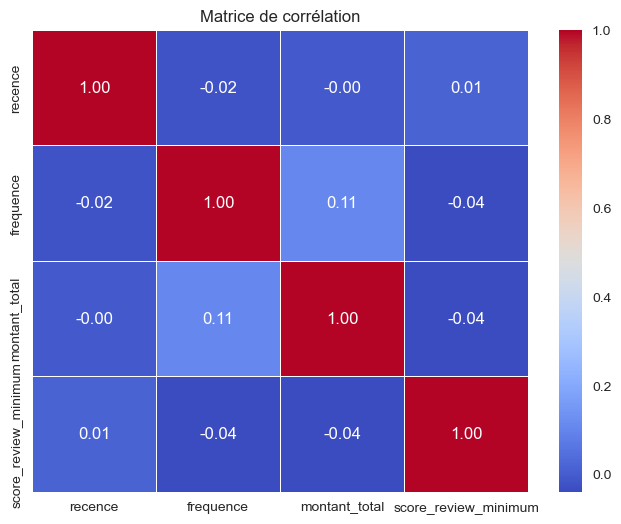

In [13]:
# Calculer la matrice de corrélation
correlation_matrix = scaled_df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

**Brève Analyse de la Matrice**

La matrice de corrélation indique une absence de corrélation forte entre les variables, ce qui est positif pour le clustering car cela suggère que chaque variable peut potentiellement ajouter des informations indépendantes sur les clients.

## Visualisation des relations entre les variables

Enfin, nous examinons les relations entre paires de variables à l'aide de graphiques de dispersion.

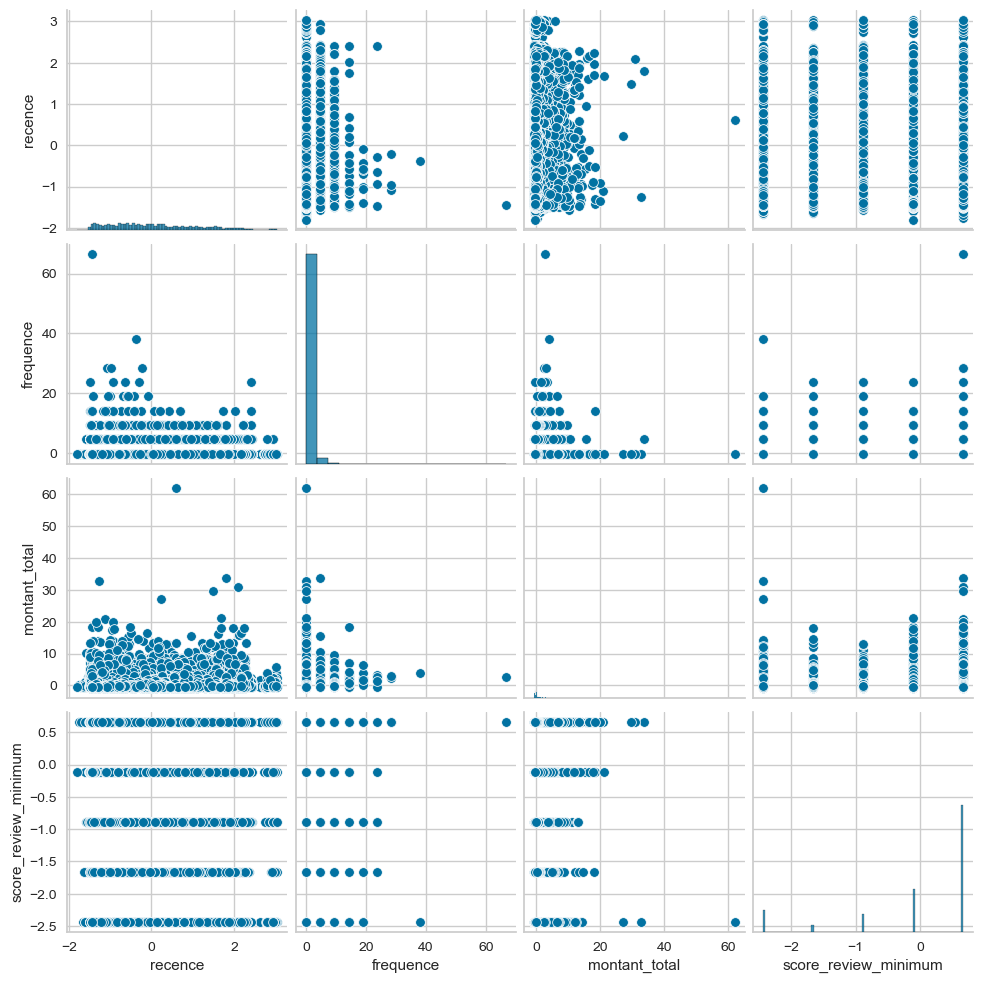

In [14]:
# Créer des graphiques de dispersion pour chaque paire de variables
sns.pairplot(scaled_df)
plt.show()

**Brève Analyse des Graphiques de Dispersion**

Les graphiques de dispersion confirment l'absence de corrélations linéaires fortes et révèlent la présence de groupes distincts dans certaines combinaisons de variables. Cela pourrait indiquer des segments naturels au sein de la clientèle.

**Conclusion de l'EDA**

L'EDA nous a permis d'identifier les caractéristiques clés de chaque variable et de préparer le terrain pour la segmentation des clients. Les distributions des variables et les analyses de corrélation indiquent que nos données sont prêtes pour un clustering efficace, qui révélera les différents segments de clientèle d'Olist.

# Sauvegarde des Résultats<a class="anchor" id="Analyse-Exploratoire-des-Données-EDA"></a>

[Retour au sommaire](#sommaire)

In [15]:
path_csv = 'C:/Users/Farid/Documents/OC/Cursus_Data_Scientist/Projet_5/data/scaled_data.csv'
path_joblib = 'C:/Users/Farid/Documents/OC/Cursus_Data_Scientist/Projet_5/data/scaler.joblib'


# Sauvegarder les données transformées dans un fichier CSV
scaled_df.to_csv(path_csv, index=False)

# Sauvegarder également l'objet StandardScaler pour une utilisation future
from joblib import dump
dump(scaler, path_joblib)

['C:/Users/Farid/Documents/OC/Cursus_Data_Scientist/Projet_5/data/scaler.joblib']